In [1]:
from tensorflow import keras
import numpy as np
import os
import cv2

In [2]:
model = keras.models.load_model('./best_model3.keras')

In [3]:
model

<Sequential name=sequential_5, built=True>

레이블 개수: 200, 이미지 파일 개수: 200
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 994ms/step
horse (1).jpg: 말, 확률: 0.86
horse (1).png: 말, 확률: 0.96
horse (10).jpg: 말, 확률: 0.99
horse (11).jpg: 말, 확률: 0.99
horse (12).jpg: 말, 확률: 0.73
horse (13).jpg: 말, 확률: 0.82
horse (14).jpg: 말, 확률: 0.92
horse (15).jpg: 말, 확률: 0.99
horse (16).jpg: 말, 확률: 0.99
horse (17).jpg: 말, 확률: 0.97
horse (18).jpg: 말, 확률: 1.00
horse (19).jpg: 말, 확률: 0.82
horse (2).jpg: 말, 확률: 0.99
horse (2).png: 말, 확률: 1.00
horse (20).jpg: 말, 확률: 0.95
horse (21).jpg: 말, 확률: 0.84
horse (22).jpg: 말, 확률: 0.94
horse (23).jpg: 말, 확률: 0.98
horse (24).jpg: 말, 확률: 0.99
horse (25).jpg: 말, 확률: 1.00
horse (26).jpg: 말, 확률: 0.67
horse (27).jpg: 말, 확률: 1.00
horse (28).jpg: 말, 확률: 1.00
horse (29).jpg: 말, 확률: 0.99
horse (3).jpg: 말, 확률: 0.99
horse (3).png: 사람, 확률: 0.99
horse (30).jpg: 사람, 확률: 0.73
horse (31).jpg: 말, 확률: 1.00
horse (32).jpg: 말, 확률: 0.99
horse (33).jpg: 말, 확률: 0.82
horse (34).jpg: 말, 확률: 0.89
horse (35).jpg: 사람, 확률: 0.54
horse (36).jpg: 말, 확률: 0.98
horse (37).j

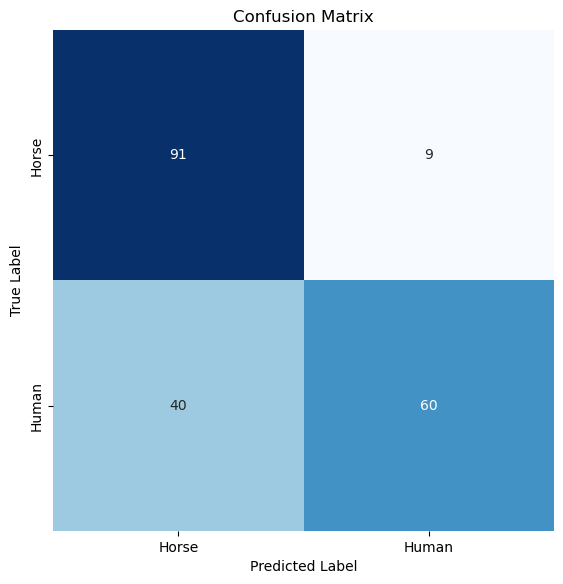

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 이미지 경로 설정
dlist = './data/test/'
predict_list = [f for f in os.listdir(dlist) if f.lower().endswith(('jpg', 'jpeg', 'png', 'webp'))]  # 이미지 파일만 선택

# 실제 레이블 설정 (파일 이름에 따라 설정)
true_labels = []
for file_name in predict_list:
    if "human" in file_name or "사람" in file_name:  # 사람을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(1)  # 사람 -> 1
    elif "horse" in file_name or "말" in file_name:  # 말을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(0)  # 말 -> 0

print(f"레이블 개수: {len(true_labels)}, 이미지 파일 개수: {len(predict_list)}")

# 실제 레이블과 예측할 이미지 개수가 일치하는지 확인
assert len(true_labels) == len(predict_list), "레이블과 이미지 파일 개수가 일치하지 않습니다."

# 이미지 전처리
img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (224, 224)) for i in img]  # 모델 입력 크기에 맞게 이미지 크기 조정
img = np.array(img)
img = img.astype('float32') / 255.0  # 정규화

# 모델 분류
cutoff = 0.5  # 분류 기준점
predictions = model.predict(img)  # 모델의 예측 값 반환

# 예측 레이블 및 혼동 행렬 생성용 데이터
predicted_labels = []
correct_count = 0
total_count = len(predictions)

for idx, prediction in enumerate(predictions):
    file_name = predict_list[idx]
    
    # 예측 확률 및 레이블 처리 (바이너리 분류)
    confidence = prediction[0]  # 이진 분류로 예측된 단일 확률 값을 사용
    predicted_label = 1 if confidence >= cutoff else 0  # cutoff에 따른 예측 레이블
    predicted_labels.append(predicted_label)  # 예측된 레이블 저장
    
    # 실제 레이블과 예측 레이블을 비교
    if predicted_label == true_labels[idx]:
        correct_count += 1  # 맞춘 경우 카운트 증가
    
    # 파일 이름과 확률 출력
    if predicted_label == 1:
        print(f"{file_name}: 사람, 확률: {confidence:.2f}")
    else:
        print(f"{file_name}: 말, 확률: {1 - confidence:.2f}")

# 전체 맞춘 비율 (정확도) 계산
accuracy = correct_count / total_count
print(f"\n전체 맞춘 비율(정확도): {accuracy * 100:.2f}%")

# 혼동 행렬 계산
cm = confusion_matrix(true_labels, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(6.5, 6.5))  # 기본 크기의 1.3배
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
